In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# read data from local file
df =  pd.read_csv("E:/Media Campaign Cost Dataset/train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

There is no missing values to handle in this dataset. We could drop the 'id' column to simplify the dataset

In [ ]:
df = df.drop("id", axis="columns")

In [12]:
# check the duplicated values
df.duplicated(subset = list(df)[0:-1]).value_counts()[0]

360336

Thers is no duplicated value

In [10]:
df.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


The summary table tells 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_fod', 'florist' are binary variables and the rest seems like continuous variables at this moment.
<br>
Also we can find the skewness of the distribution of each varible by comparing the median and the mean. Then check the distribution with data visualization tools.

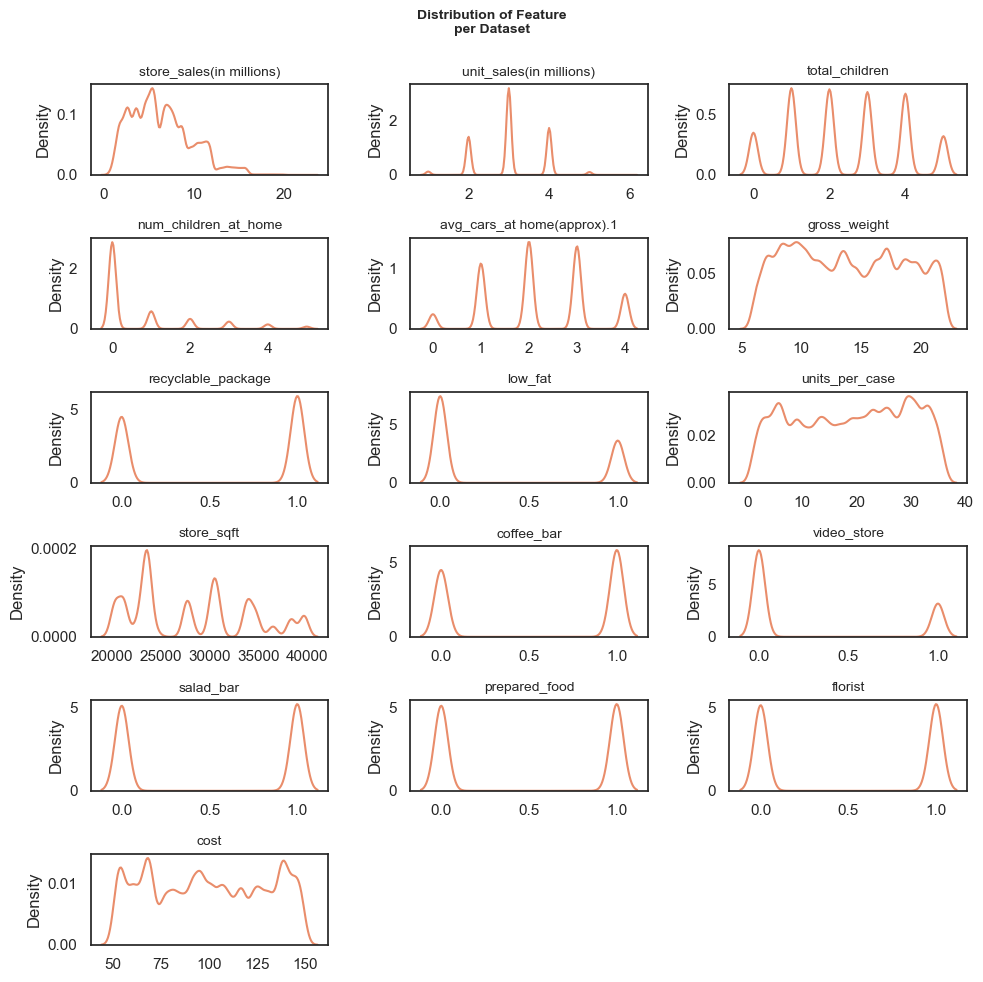

In [31]:
sb.set_theme(style = 'white', palette = 'flare')
color = sb.color_palette('flare')
fig, axs = plt.subplots(6,3,figsize=(10,10))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    sb.kdeplot(df[column], ax=axs[i], color=color[0])    
    axs[i].set_title(f'{column}',fontsize=10)
    axs[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 10, fontweight = 'bold')
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
plt.tight_layout()

Next, we check how the features are correlated to each other. 

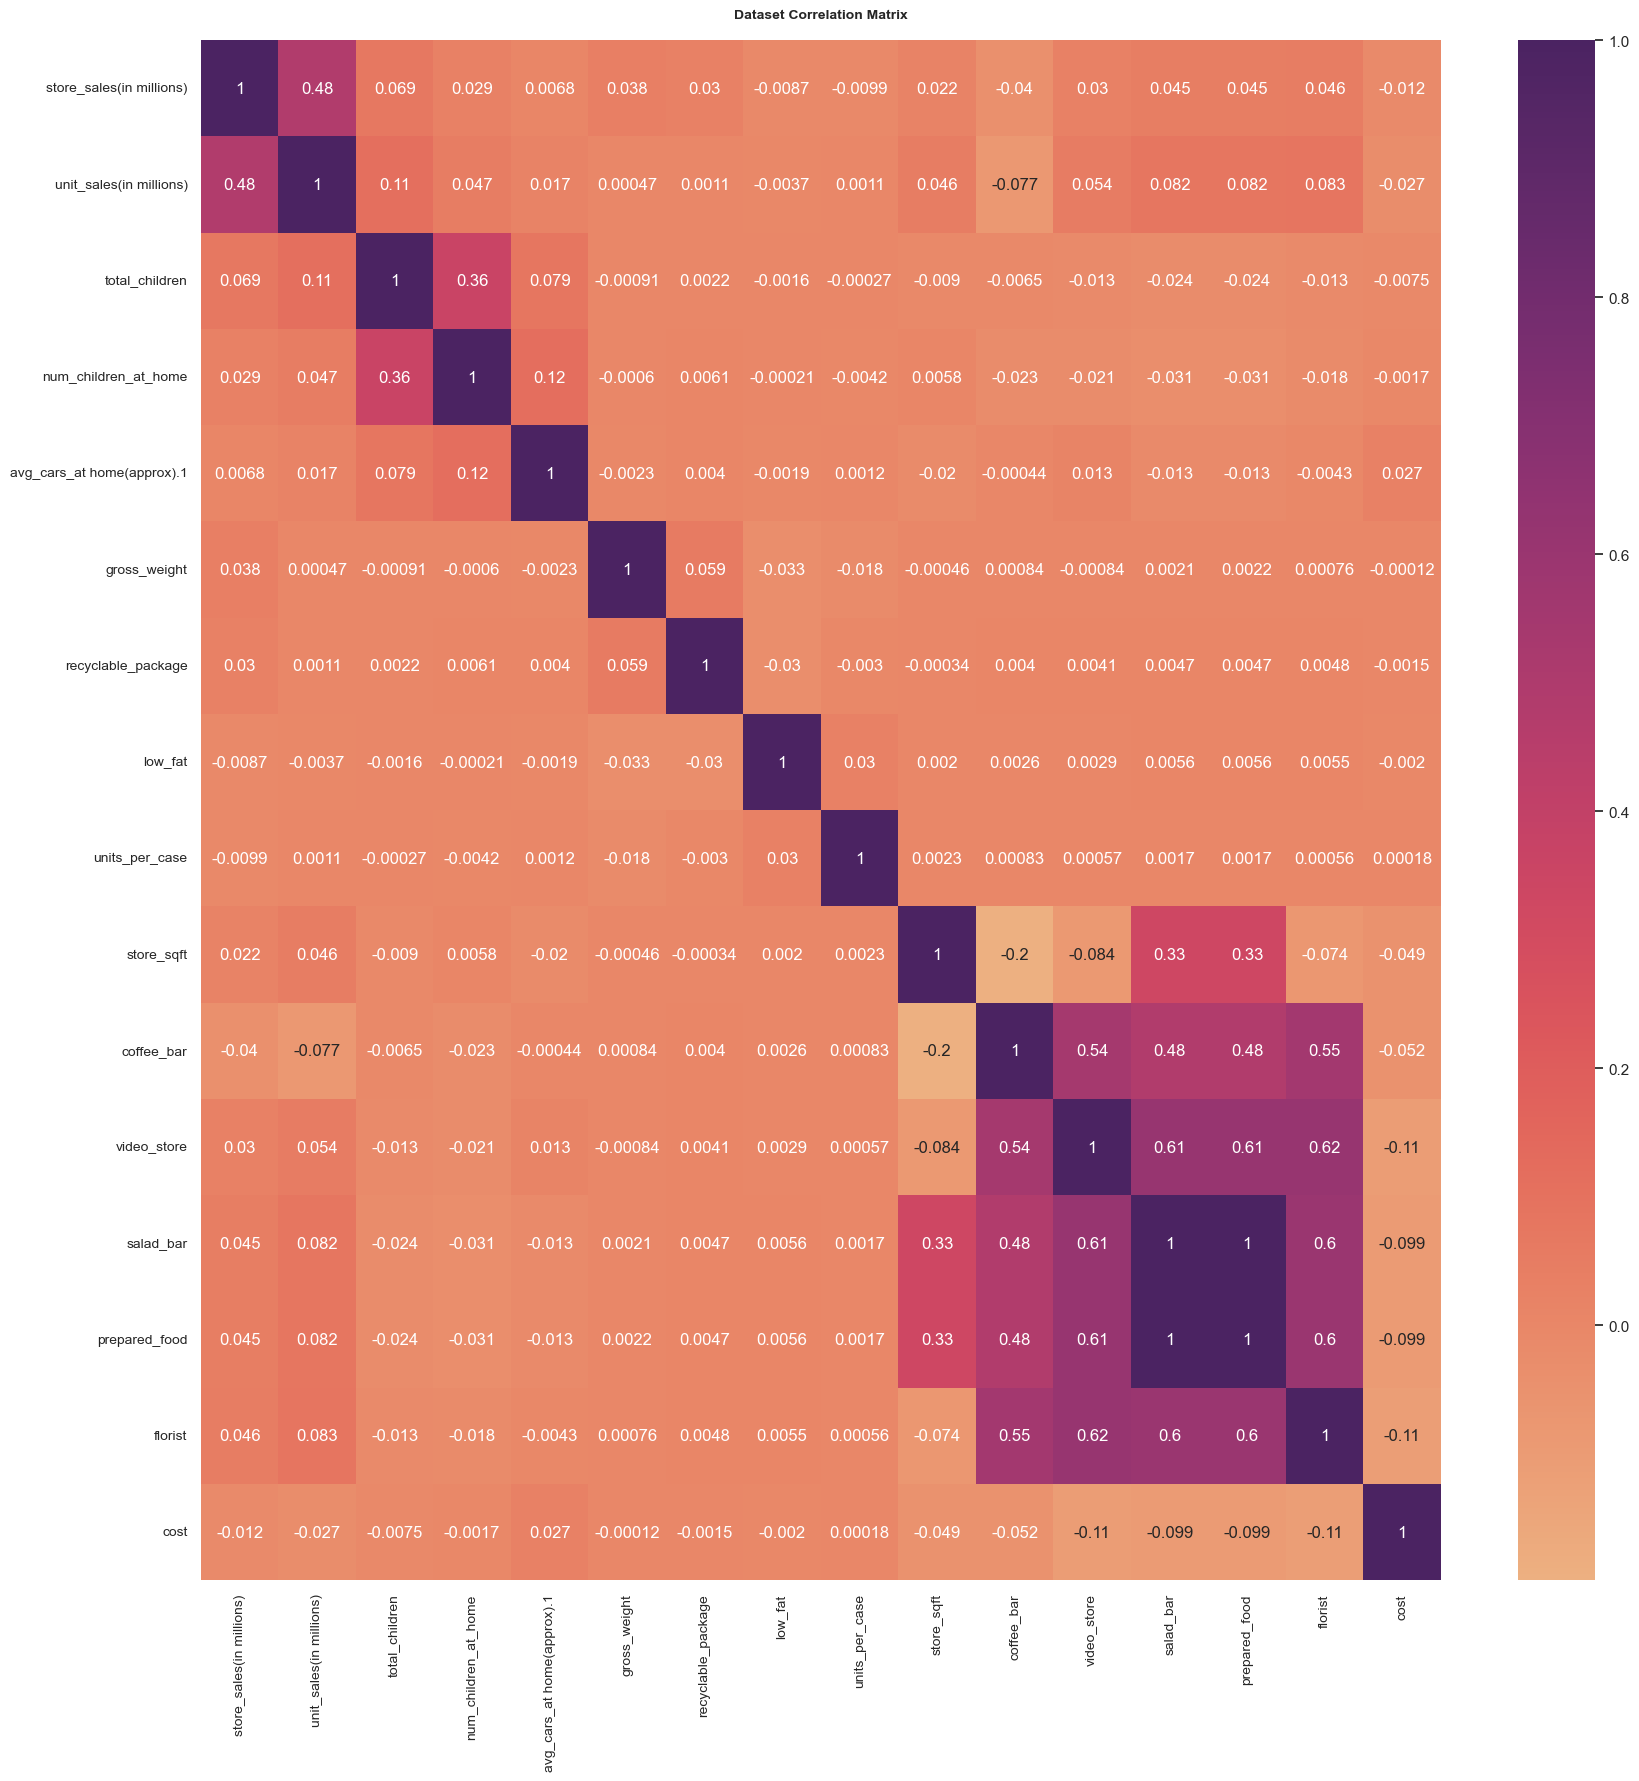

In [33]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sb.heatmap(correlation, annot=True, cmap='flare')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.title('Dataset Correlation Matrix\n', fontsize = 10, weight = 'bold')
plt.show()

* The correlation coeffient between 'prepared_food' and 'salad_bar' is exactly one which indicates the prepared food means the salad itself and we could drop one of them. * And most moderate correlated features are among 'coffee_bar', 'salad_bar'('prepared_food'), 'video_store' and 'florist'. We could consider either combining these features and create a new feature, reducing dimension or adding regularization term in the model.
 * We could replace 'total_children' and 'num_children at home' by the difference of them or the ratio of children at home.
* Other moderate correlation can be foung between 'unit_sales(in million)' and 'total_sales(in million dollars)'. We can engineer the feature to get 'average sales'.
* Apart from bullets mentioned above, most features seem to have positive impact on reducing the cost except units_per_case and average cars at home. * Finanlly, feature selection can be conducted by feature importance while building tree based model. 